In [1]:
import pandas as pd
import numpy as np 
import datetime as dt
import seaborn as sns
import math
import re
import scipy

from random import randint
from pylab import * 
import matplotlib.pyplot as plt 
import matplotlib
import datetime

from sklearn import preprocessing

In [2]:
def convert_time(df):
    df = df[df['closed_at'] != '?']
    df.closed_at = pd.to_datetime(df['closed_at'], format='%d/%m/%Y %H:%M')
    df.opened_at = pd.to_datetime(df['opened_at'], format='%d/%m/%Y %H:%M')

    return df

In [3]:
def time_taken(df):
    difference = []
    for i, row in df.iterrows():
        delta = df.closed_at[i] - df.opened_at[i]
        difference.append(delta.total_seconds())
        
    df['time_taken'] = difference
    
    return df

In [4]:
incident = pd.read_csv('incident_event_log_copie.csv', sep=";")
### incident = incident[incident['resolved_at'] != '?']
### incident.resolved_at = pd.to_datetime(incident['resolved_at'], format='%d/%m/%Y %H:%M')
### incident.opened_at = pd.to_datetime(incident['opened_at'], format='%d/%m/%Y %H:%M')

In [5]:
### Je convertis les colonnes closed_at et opened_at en datetype pour la suite
incident = convert_time(incident)

In [6]:
### Je convertis les colonnes priority, impact, urgency

incident['priority'] = incident['priority'].astype('category')
incident['priority'] = incident['priority'].cat.reorder_categories(['1 - Critical', '2 - High', '3 - Moderate', '4 - Low'], ordered=False)
incident['priority'] = incident['priority'].cat.codes

### Je drop les colonnes impact et urgency car priority est calculé grace à elles
incident.drop(['impact','urgency'], axis='columns', inplace=True)

In [7]:
### Je remplace toutes les valeurs "?" en NA
incident = incident.replace("?", np.nan)

In [8]:
### Je regarde le nombre de ligne présente dans le dataset
incident.shape[0]

141712

In [9]:
### Je fais la somme de chaque NA dans chaque colonne 
incident.isna().sum(axis = 0)

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc                        140721
vendor                     141468
caused_by     

In [10]:
### Je drop toutes les colonnes avec trop de valeurs NA
incident.drop(['sys_created_by','sys_created_at','u_symptom','cmdb_ci','problem_id','rfc','vendor','caused_by'], axis='columns', inplace=True)

In [11]:
incident = time_taken(incident)

In [12]:
### Je drop ces colonnes car j'ai recupéré une valeur grace à ces colonnes avec ma fonction time_taken
incident.drop(['opened_at','closed_at','resolved_at'], axis='columns', inplace=True)
incident.dtypes

number                      object
incident_state              object
active                        bool
reassignment_count           int64
reopen_count                 int64
sys_mod_count                int64
made_sla                      bool
caller_id                   object
opened_by                   object
sys_updated_by              object
sys_updated_at              object
contact_type                object
location                    object
category                    object
subcategory                 object
priority                     int64
assignment_group            object
assigned_to                 object
knowledge                     bool
u_priority_confirmation       bool
notify                      object
closed_code                 object
resolved_by                 object
time_taken                 float64
dtype: object

In [13]:
### Convertis tous les objets en float
from sklearn import preprocessing

for column in incident.select_dtypes(include=['object']):
    incident[column], _ = pd.factorize(incident[column])
    x = incident[[column]].values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    incident[column]=x_scaled

In [14]:
### Je vérifie le changement de types
incident.dtypes

number                     float64
incident_state             float64
active                        bool
reassignment_count           int64
reopen_count                 int64
sys_mod_count                int64
made_sla                      bool
caller_id                  float64
opened_by                  float64
sys_updated_by             float64
sys_updated_at             float64
contact_type               float64
location                   float64
category                   float64
subcategory                float64
priority                     int64
assignment_group           float64
assigned_to                float64
knowledge                     bool
u_priority_confirmation       bool
notify                     float64
closed_code                float64
resolved_by                float64
time_taken                 float64
dtype: object

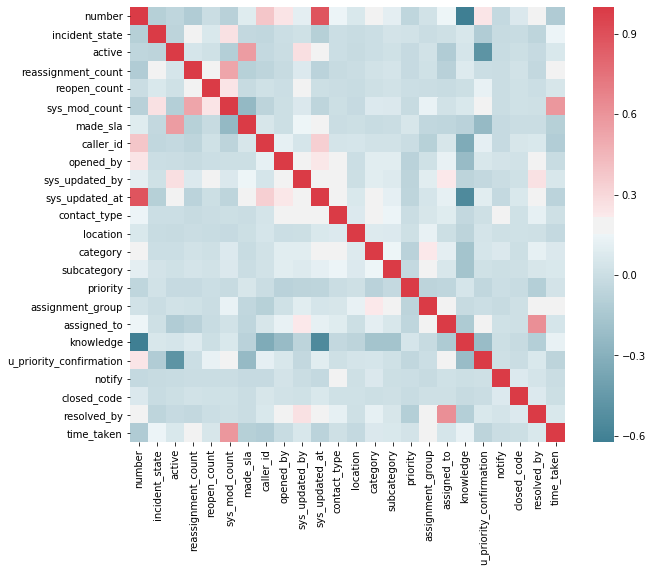

In [15]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = incident.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [16]:
### Je drop toutes ces colonnes d'après le tableau de corrélation 
incident.drop(['made_sla','caller_id','opened_by','sys_updated_by','sys_updated_at','contact_type','location','category','subcategory','u_priority_confirmation','notify','resolved_by'], axis='columns', inplace=True)

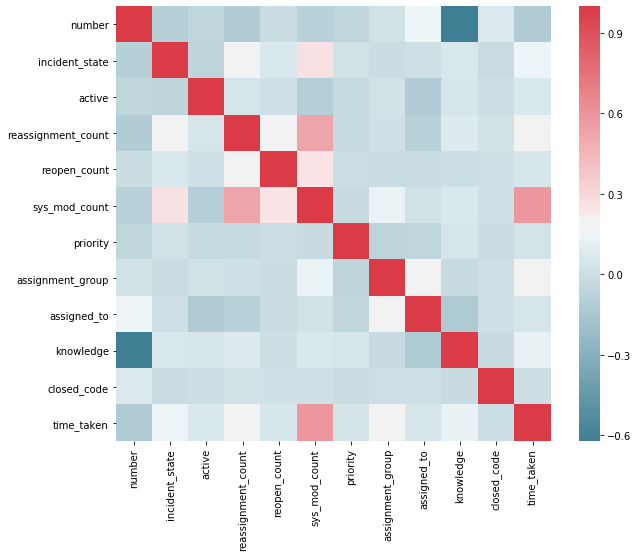

In [17]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = incident.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

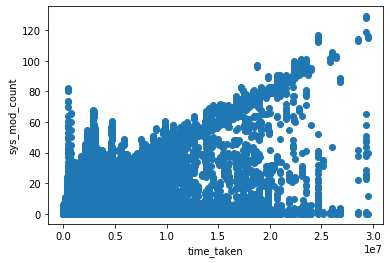

In [18]:
x = range(0,incident.shape[0])
x = incident["time_taken"]
y = incident["sys_mod_count"]
plt.scatter(x, y)
plt.xlabel('time_taken')
plt.ylabel('sys_mod_count')

plt.show()

### on va voir si il y a une correlation entre le nombre d'update sur un ticket et le temps de résolution 
### COmme on peut voir le temps de résolution est plus élevé lorsque le nombre d'update sur un ticket est élévé 

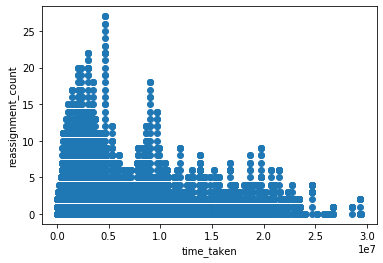

In [19]:
x = range(0,incident.shape[0])
x = incident["time_taken"]
y = incident["reassignment_count"]
plt.scatter(x, y)
plt.xlabel('time_taken')
plt.ylabel('reassignment_count')

plt.show()

### on va voir si il y a une correlation entre le nombre de reassignement et le temps de résolution 
### COmme on peut voir le temps de résolution est plus 

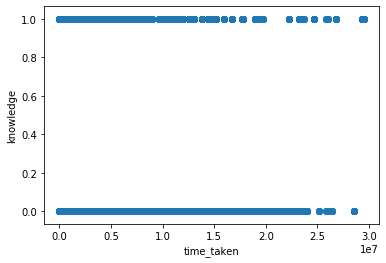

In [20]:
x = range(0,incident.shape[0])
x = incident["time_taken"]
y = incident["knowledge"]
plt.scatter(x, y)
plt.xlabel('time_taken')
plt.ylabel('knowledge')

plt.show()

### on va voir si il y a une correlation entre l'utilisation de knowledge base et le temps de résolution 
### Comme on peut le voir le graph choisit n'est pas pertinent pour ces données

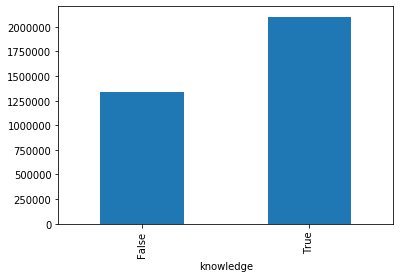

In [21]:
incident.groupby('knowledge')['time_taken'].mean().plot(kind="bar")

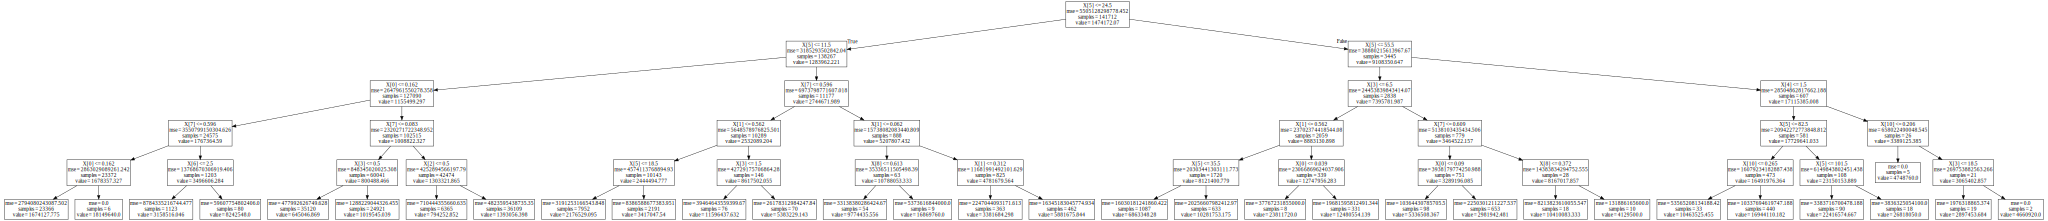

In [22]:
# import export_graphviz 
from sklearn.tree import export_graphviz

df = incident.copy()
X = df.drop('time_taken', axis=1)
y = df['time_taken']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
##Tree Decision Regressor
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=5)
regressor.fit(X, y)
y_pred = regressor.predict(X_test)
y_pred

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)



In [23]:
regressor.score(X,y)

0.4710135090407444

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
params = { 
            "n_estimators"      : [10, 20, 30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

model_2 = GridSearchCV(rfr, params, n_jobs = -1, cv = 5)
model_2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
     

In [26]:
model_2.score(X,y)

0.9174278470084197